# Спектральный контраст

Метод Spectral Contrast (спектральный контраст) является одним из методов анализа звука, используемых в цифровой обработке звука и музыкальном информационном извлечении. Этот метод используется для извлечения важной информации о звуке, связанной с изменением частотной составляющей сигнала.

Идея метода Spectral Contrast заключается в том, чтобы измерить разницу между спектральной плотностью мощности звука в ячейках частотной оси. Для этого сначала разделяют спектр на несколько полос с различными центральными частотами и ширинами полос. Затем для каждой полосы вычисляется спектральный контраст.

Спектральный контраст для каждой полосы рассчитывается как разность между средней спектральной плотностью мощности внутри полосы и средней спектральной плотностью мощности вне полосы. Таким образом, спектральный контраст представляет собой меру того, насколько сильно звук выделяется в данной частотной полосе.

Формально, спектральный контраст вычисляется по следующей формуле:

$$\frac{\sum_{j=1}^N S(j,i)(f_j-f_i)^2}{\sum_{j=1}^N S(j,i)}$$

где $S(j,i)$ - спектральная мощность на $i$-й полосе частот во временном окне $j$, $N$ - количество временных окон.

In [18]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [19]:
pick = ['audios/A_pick.wav', 'audios/B_pick.wav', 'audios/D_pick.wav', 'audios/e_pick.wav', 'audios/E_pick.wav', 'audios/G_pick.wav']
finger = ['audios/A_finger.wav', 'audios/B_finger.wav', 'audios/D_finger.wav', 'audios/e_finger.wav', 'audios/E_finger.wav', 'audios/G_finger.wav']

In [20]:
def contrast_helper(y, sr):
        S = np.abs(librosa.stft(y))
        contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

        return S, contrast

In [21]:
def get_contrast(path1, path2):
    audio_file_1, sr_1 = librosa.load(f'{path1}')
    audio_file1, index_1 = librosa.effects.trim(audio_file_1)
    audio_file_2, sr_2 = librosa.load(f'{path2}')
    audio_file2, index_2 = librosa.effects.trim(audio_file_2)

    S, contrast = contrast_helper(audio_file1, sr_1)
    S1, contrast1 = contrast_helper(audio_file2, sr_2)

    return contrast, contrast1

Спектральный контраст для каждого сэмпла

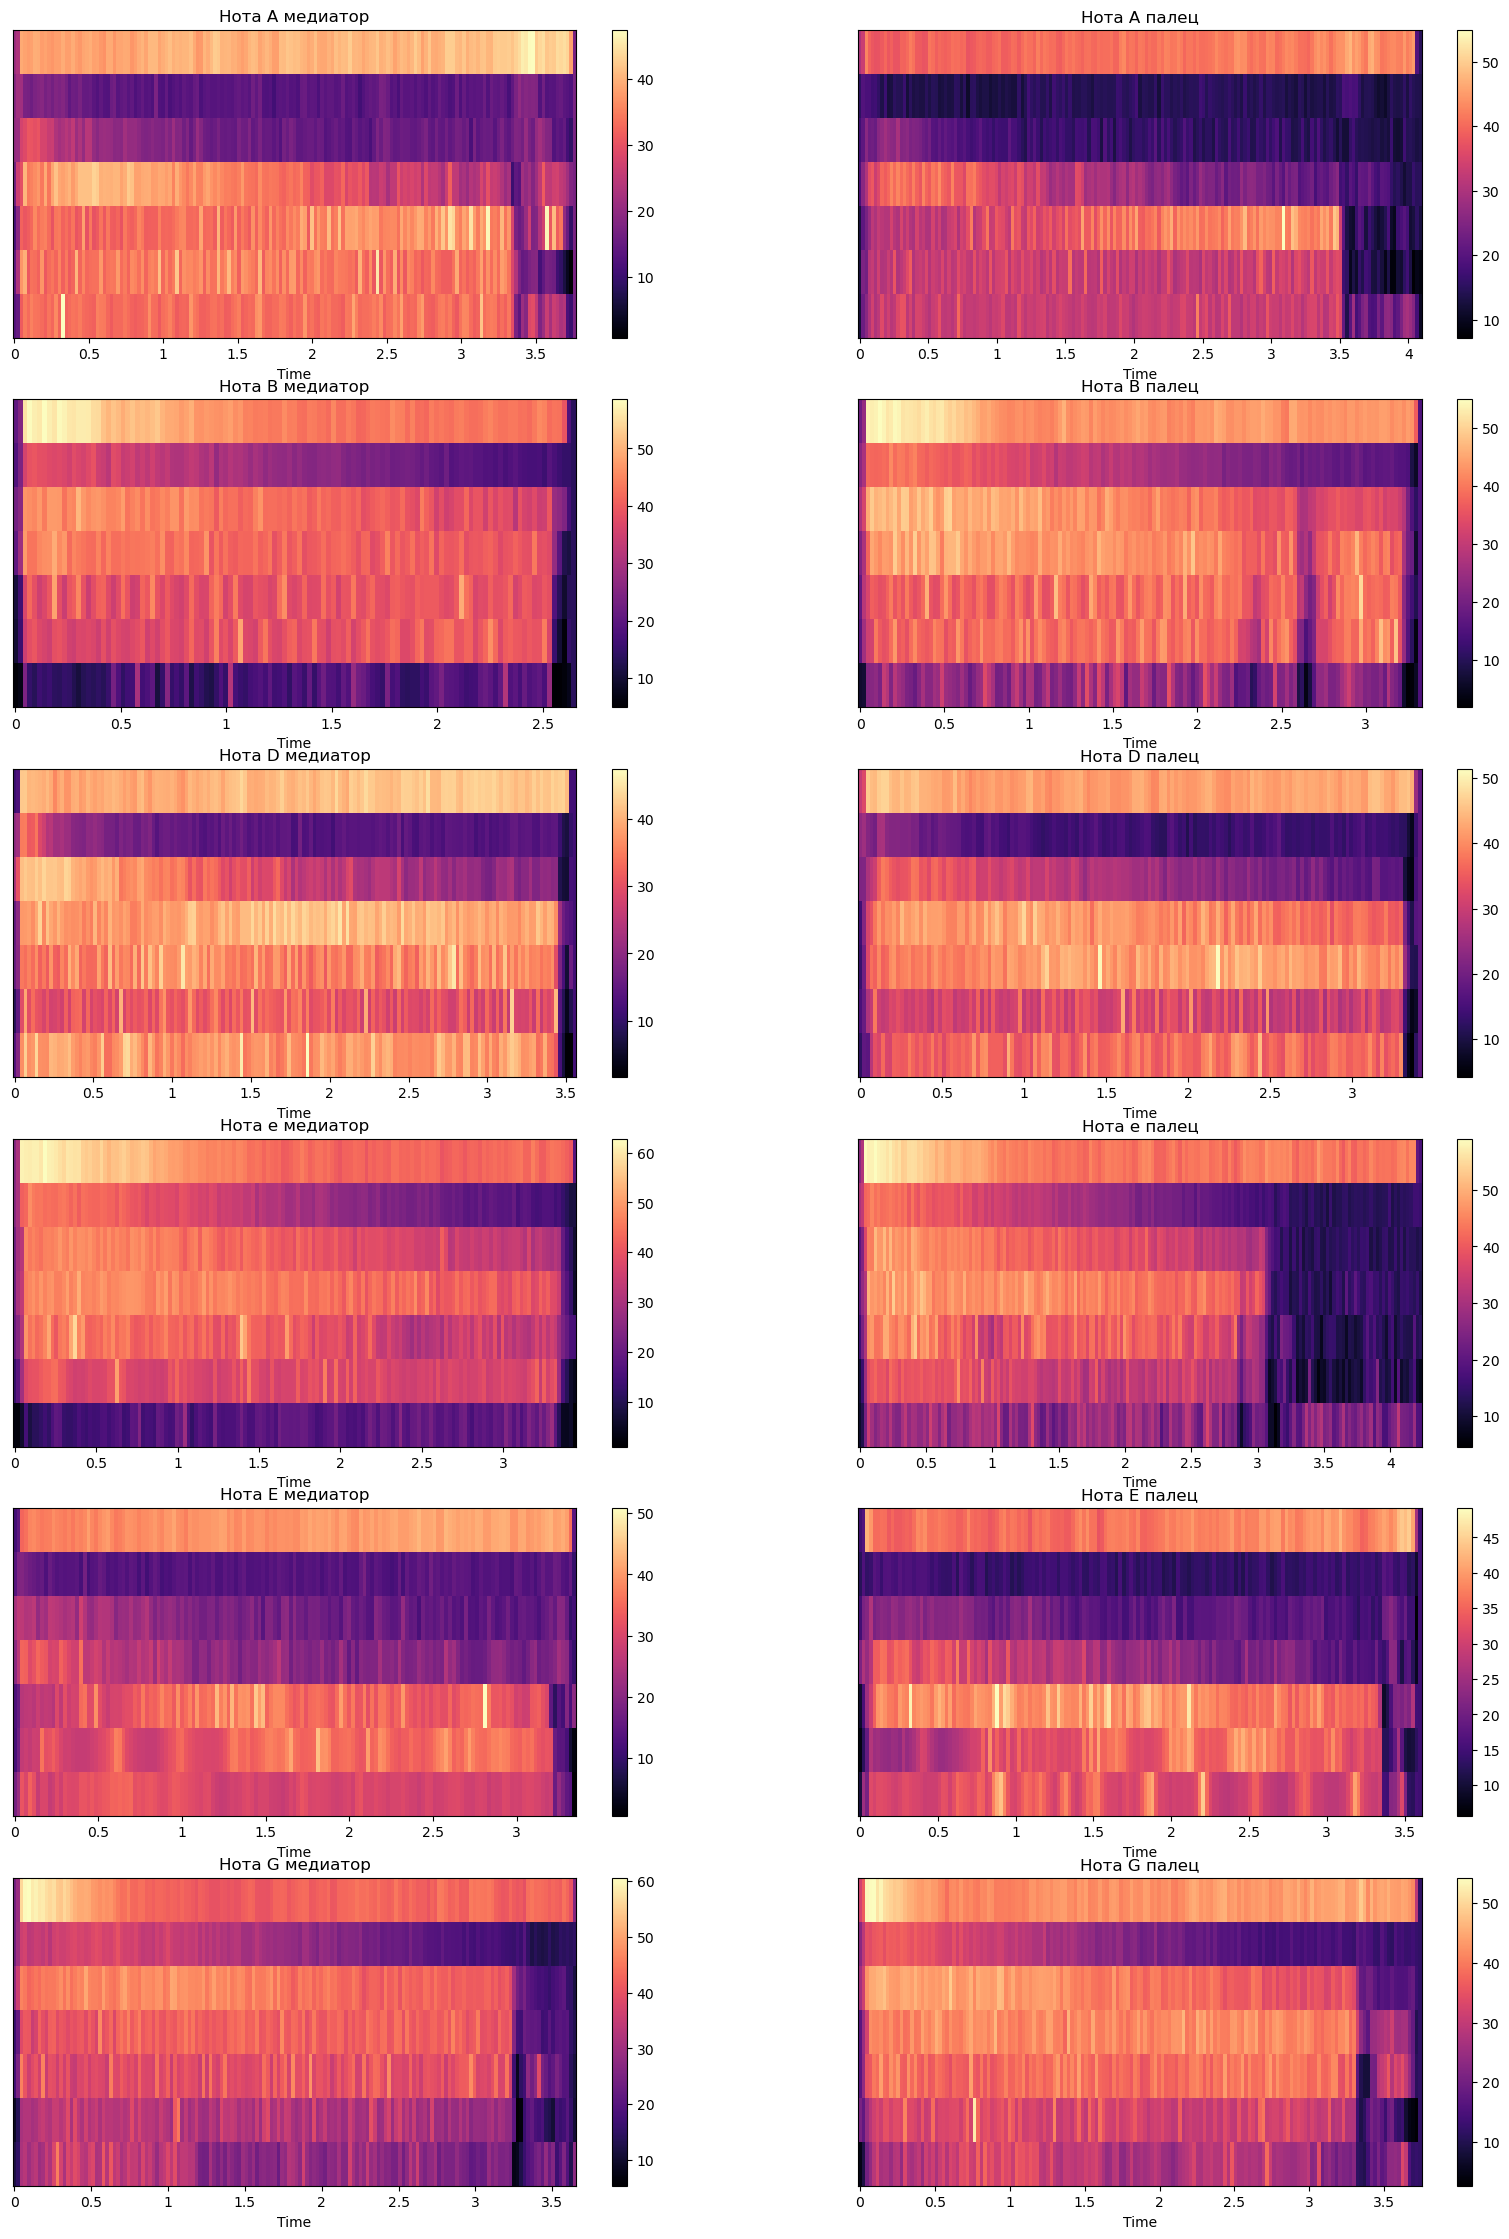

In [42]:
plt.figure(0, figsize=(20, 28))
ax_number = 0
for i, (path1, path2) in enumerate(zip(pick, finger)):
    contrast, contrast1 = get_contrast(path1, path2)

    ax = plt.subplot2grid((6,2), (i,0))
    ax.set_title(f'Нота {path1[-10]} медиатор')
    img1 = librosa.display.specshow(contrast, x_axis='time', ax=ax)
    plt.colorbar(img1)

    ax = plt.subplot2grid((6,2), (i,1))
    ax.set_title(f'Нота {path1[-10]} палец')
    img2 = librosa.display.specshow(contrast1, x_axis='time', ax=ax)
    plt.colorbar(img2)

plt.show()

In [23]:
def show_statistics(method, path1, path2):
    audio_file_1, sr_1 = librosa.load(f'{path1}')
    audio_file1, index_1 = librosa.effects.trim(audio_file_1)
    audio_file_2, sr_2 = librosa.load(f'{path2}')
    audio_file2, index_2 = librosa.effects.trim(audio_file_2)

    S, contrast = contrast_helper(audio_file1, sr_1)
    S1, contrast1 = contrast_helper(audio_file2, sr_2)

    categories = ['Октава 1', 'Октава 2', 'Октава 3', 'Октава 4', 'Октава 5', 'Октава 6', 'Октава 7']
    values_class1 = method(contrast, axis=1)  # Values for class 1
    values_class2 = method(contrast1, axis=1) * -1  # Values for class 2

    # Calculate the positions for the bars
    y_pos = np.arange(len(categories))

    return values_class1, values_class2, y_pos, categories


Среднее значение спектра для каждой октавы в сэмплах

/tmp/ipykernel_5672/1477915215.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(f'33{i+1}'))


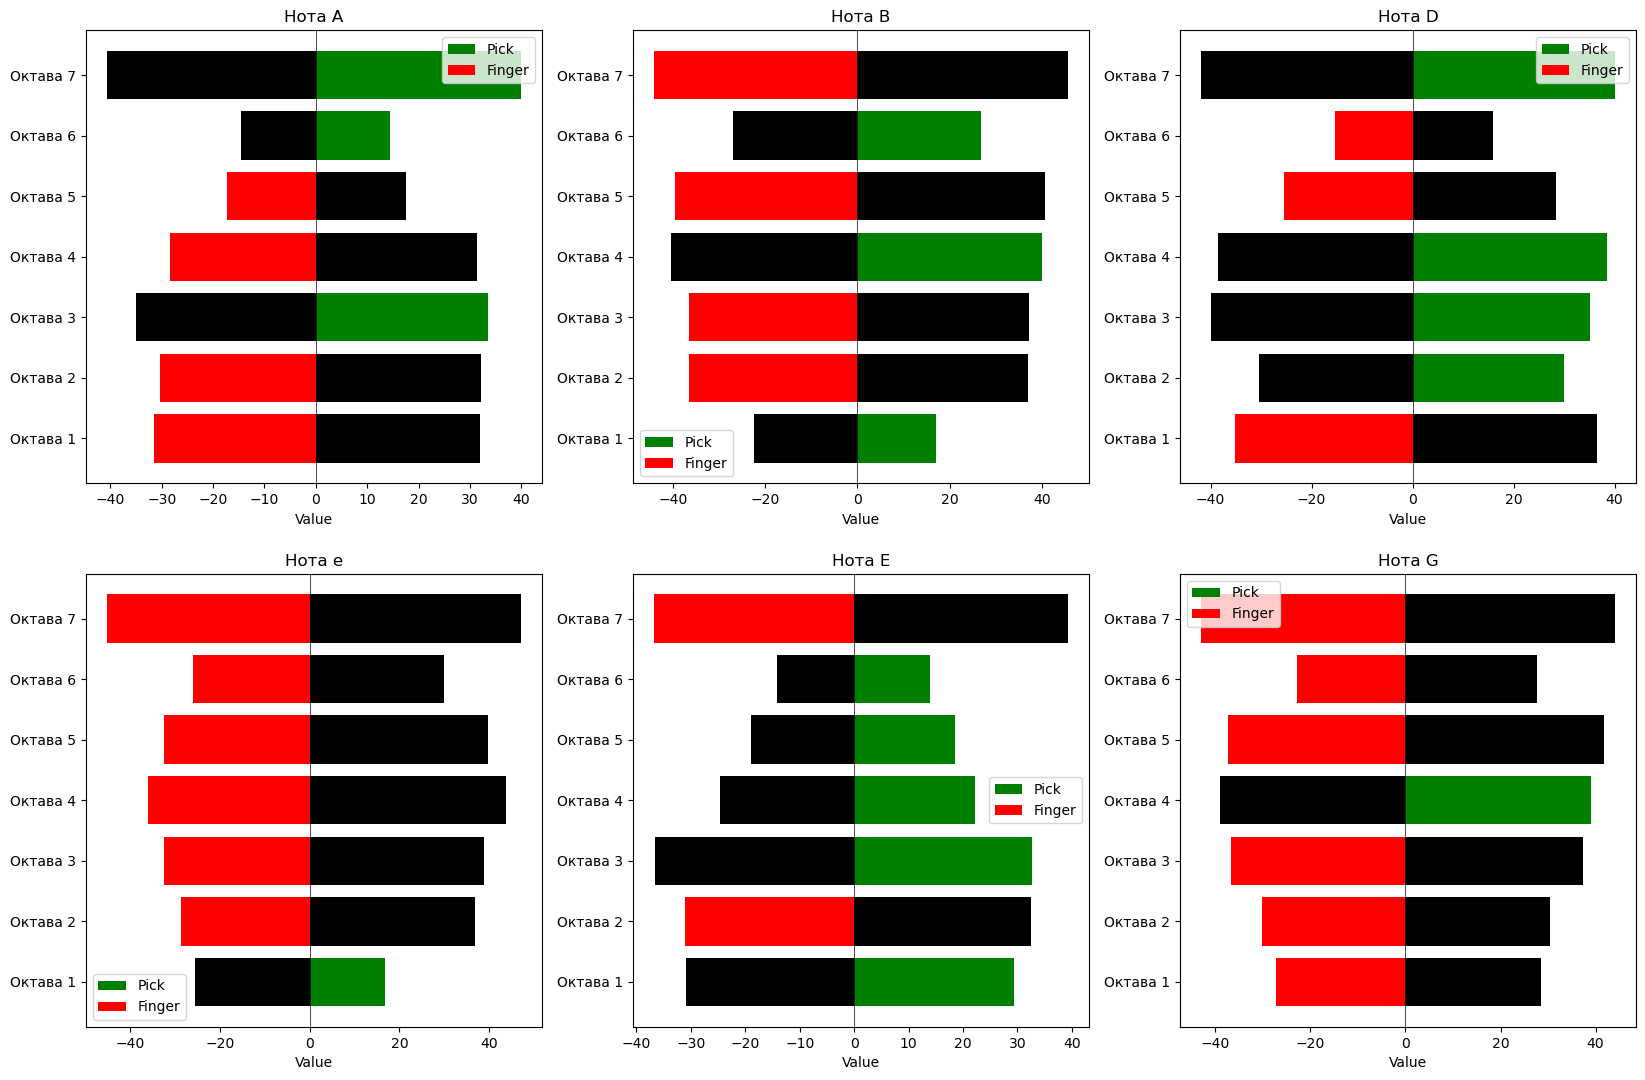

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(20, 20))
for i, (path1, path2) in enumerate(zip(pick, finger)):
    plt.subplot(int(f'33{i+1}'))
    values_class1, values_class2, y_pos, categories = show_statistics(np.mean, path1, path2)
    # Plot the bars for class 1
    plt.barh(y_pos, values_class1, align='center', color='green')

    # Plot the bars for class 2
    plt.barh(y_pos, values_class2, align='center', color='red')

    max_value_class = [a if np.abs(a) > np.abs(b) else b for a, b in zip(values_class1, values_class2)]

    plt.barh(y_pos, max_value_class, align='center', color='black')

    # Set the y-axis labels to the attribute categories
    ax = plt.subplot(int(f'33{i+1}'))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(categories)

    # Add a vertical line at the center
    plt.axvline(0, color='black', linewidth=0.5)

    # Set labels and title
    ax.set_xlabel('Value')
    ax.set_title(f'Нота {path1[-10]}')

    # Create a legend
    class1_patch = plt.Rectangle((0, 0), 1, 1, fc='green')
    class2_patch = plt.Rectangle((0, 0), 1, 1, fc='red')
    ax.legend([class1_patch, class2_patch], ['Pick', 'Finger'])

# Display the chart
plt.show()

Среднеквадратическое откланение спектра для каждой октавы в сэмплах

/tmp/ipykernel_5672/19109414.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(f'33{i+1}'))


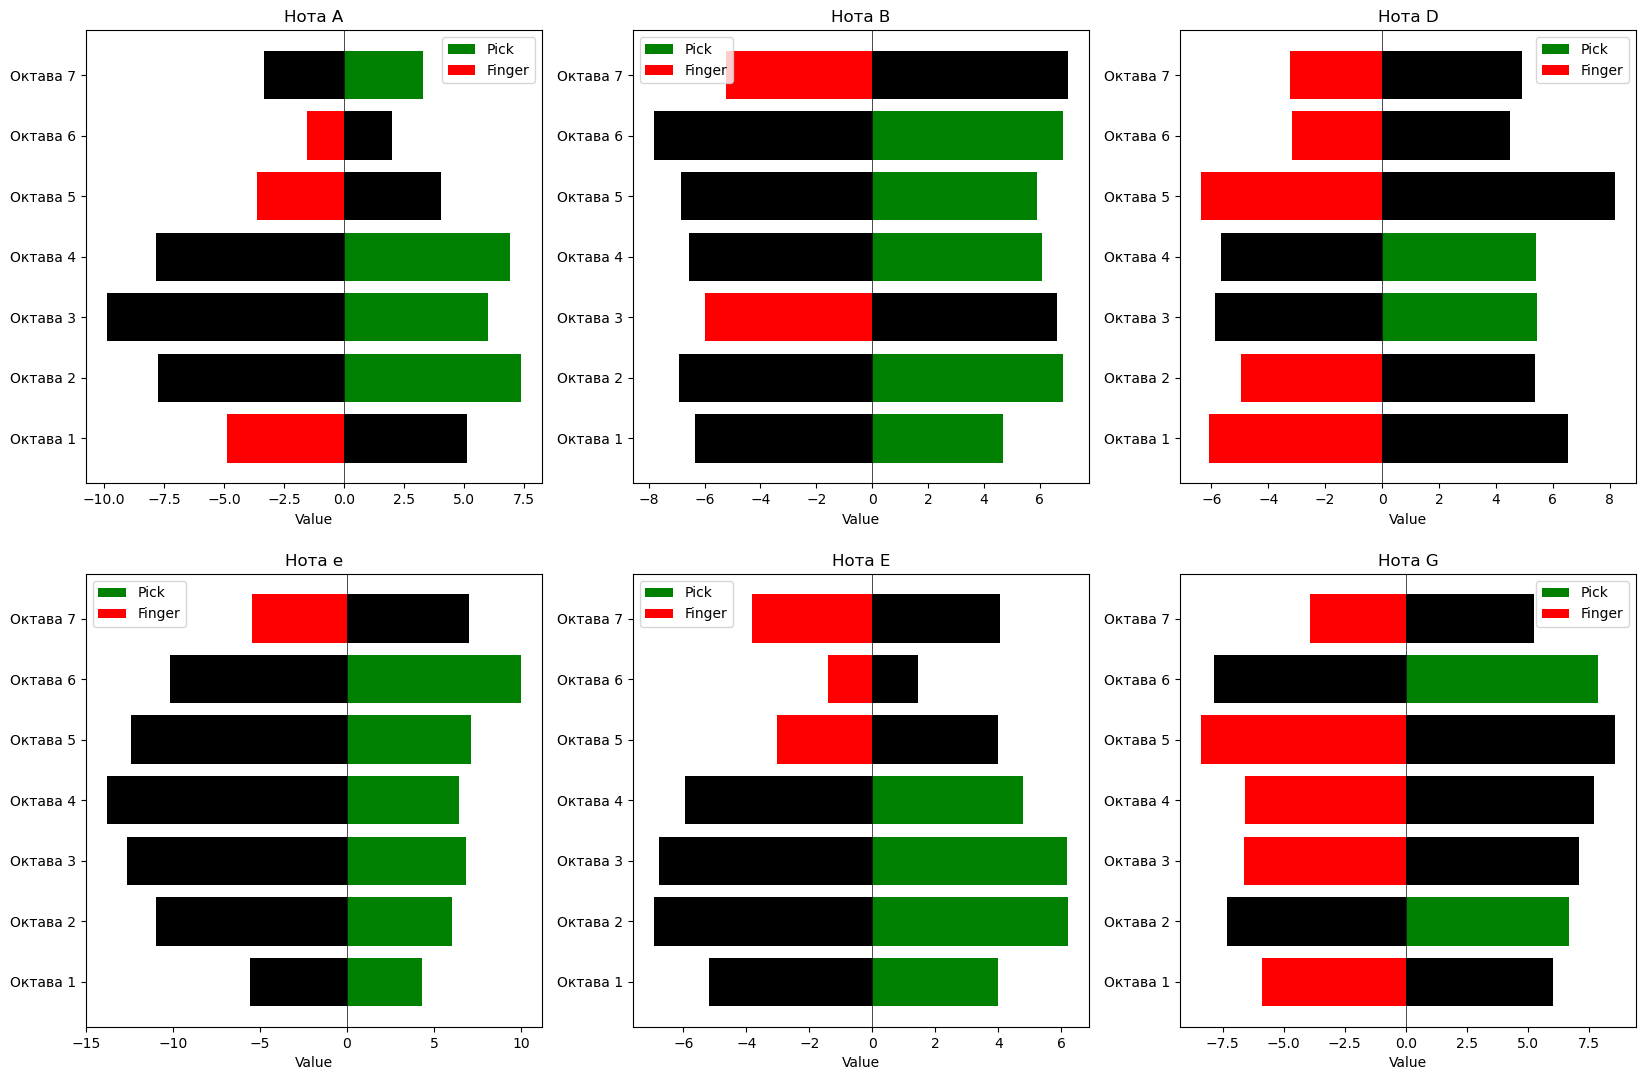

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(20, 20))
for i, (path1, path2) in enumerate(zip(pick, finger)):
    plt.subplot(int(f'33{i+1}'))
    values_class1, values_class2, y_pos, categories = show_statistics(np.std, path1, path2)
    # Plot the bars for class 1
    plt.barh(y_pos, values_class1, align='center', color='green')

    # Plot the bars for class 2
    plt.barh(y_pos, values_class2, align='center', color='red')

    max_value_class = [a if np.abs(a) > np.abs(b) else b for a, b in zip(values_class1, values_class2)]

    plt.barh(y_pos, max_value_class, align='center', color='black')

    # Set the y-axis labels to the attribute categories
    ax = plt.subplot(int(f'33{i+1}'))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(categories)

    # Add a vertical line at the center
    plt.axvline(0, color='black', linewidth=0.5)

    # Set labels and title
    ax.set_xlabel('Value')
    ax.set_title(f'Нота {path1[-10]}')

    # Create a legend
    class1_patch = plt.Rectangle((0, 0), 1, 1, fc='green')
    class2_patch = plt.Rectangle((0, 0), 1, 1, fc='red')
    ax.legend([class1_patch, class2_patch], ['Pick', 'Finger'])

# Display the chart
plt.show()

Среднее значение спектра для каждого сэмпла

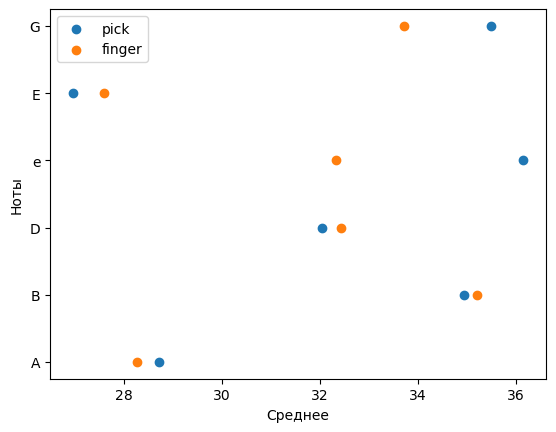

In [26]:
pick_mean = []
finger_mean = []
for path1, path2 in zip(pick, finger):
    values_class1, values_class2, y_pos, categories = show_statistics(np.mean, path1, path2)
    pick_mean.append(np.mean(values_class1))
    finger_mean.append(np.mean(values_class2 * -1))

plt.scatter(pick_mean, np.arange(6), label='pick')
plt.scatter(finger_mean, np.arange(6), label='finger')
plt.yticks(np.arange(6), ['A', 'B', 'D', 'e', 'E', 'G'])
plt.ylabel('Ноты')
plt.xlabel('Среднее')
plt.legend()
plt.show()


Среднеквадратическое откланение спектра для каждого сэмпла

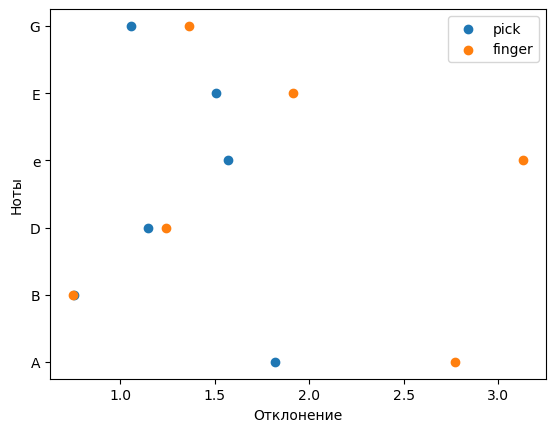

In [27]:
pick_std = []
finger_std = []
for path1, path2 in zip(pick, finger):
    values_class1, values_class2, y_pos, categories = show_statistics(np.std, path1, path2)
    pick_std.append(np.std(values_class1))
    finger_std.append(np.std(values_class2 * -1))

plt.scatter(pick_std, np.arange(6), label='pick')
plt.scatter(finger_std, np.arange(6), label='finger')
plt.yticks(np.arange(6), ['A', 'B', 'D', 'e', 'E', 'G'])
plt.ylabel('Ноты')
plt.xlabel('Отклонение')
plt.legend()
plt.show()